In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Read the dataset
data = pd.read_csv('Rainfall_and_Streamflow_Dataset.csv')

In [3]:
# Creat lag features
data['lag1_precip'] = data['precipitation_mm'].shift(1).fillna(0)
data['lag2_precip'] = data['precipitation_mm'].shift(2).fillna(0)
data['lag3_precip'] = data['precipitation_mm'].shift(3).fillna(0)

In [5]:
data['day'] = pd.to_datetime(data['date']).dt.day
data['month'] = pd.to_datetime(data['date']).dt.month

In [6]:
features = ['precipitation_mm', 'lag1_precip', 'lag2_precip', 'lag3_precip', 'day', 'month']
target = 'streamflow_cms'

In [7]:
X = data[features]
y = data[target]

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# train the model randowm forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [10]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}, R^2: {r2_rf}") 

Random Forest MSE: 0.022938000000000066, R^2: 0.610486792452829


In [11]:
# train the models linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [12]:
# evaluate the linear regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}, R^2: {r2_lr}")

Linear Regression MSE: 0.0445770546261233, R^2: 0.2430311478582835


In [13]:
# train the lodel decision tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [14]:
# evaluate the linear regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}, R^2: {r2_lr}")

Linear Regression MSE: 0.0445770546261233, R^2: 0.2430311478582835


In [15]:
# train the model gradient boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [16]:
# evaluate the linear regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}, R^2: {r2_lr}")

Linear Regression MSE: 0.0445770546261233, R^2: 0.2430311478582835


In [17]:
# comapre all evaluation 
models = {
    'Random Forest': (mse_rf, r2_rf),
    'Linear Regression': (mse_lr, r2_lr),
    'Decision Tree': (mean_squared_error(y_test, y_pred_dt), r2_score(y_test, y_pred_dt)),
    'Gradient Boosting': (mean_squared_error(y_test, y_pred_gb), r2_score(y_test, y_pred_gb))
}
for model_name, (mse, r2) in models.items():
    print(f"{model_name} - MSE: {mse}, R^2: {r2}")
    

Random Forest - MSE: 0.022938000000000066, R^2: 0.610486792452829
Linear Regression - MSE: 0.0445770546261233, R^2: 0.2430311478582835
Decision Tree - MSE: 0.05833333333333335, R^2: 0.009433962264150497
Gradient Boosting - MSE: 0.018534535800433, R^2: 0.6852625996152887


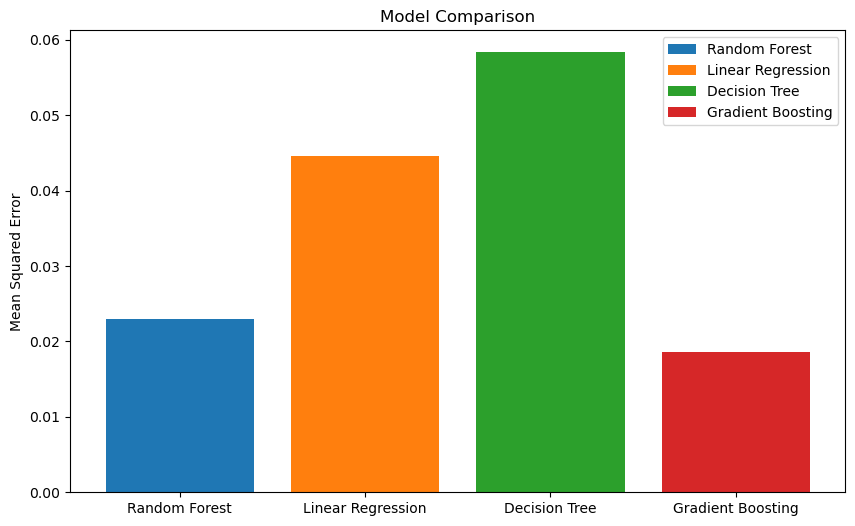

In [ ]:
# plot the results
plt.figure(figsize=(10, 6))
for i , (model_name, (mse, r2)) in enumerate(models.items()):
    plt.bar(i, mse, label=model_name)
plt.xticks(range(len(models)), models.keys())
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison')
plt.legend()
plt.show()

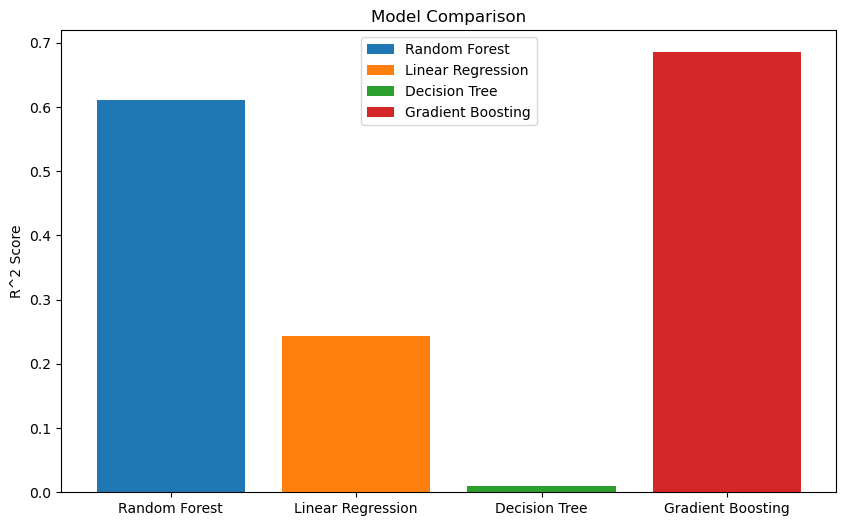

In [19]:
# plot the 
plt.figure(figsize=(10, 6))
for i, (model_name, (mse, r2)) in enumerate(models.items()):
    plt.bar(i, r2, label=model_name)
plt.xticks(range(len(models)), models.keys())
plt.ylabel('R^2 Score')
plt.title('Model Comparison')
plt.legend()
plt.show()

In [52]:
models_y_predict = {
    'Random Forest': y_pred_rf,
    'Linear Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Gradient Boosting': y_pred_gb
}


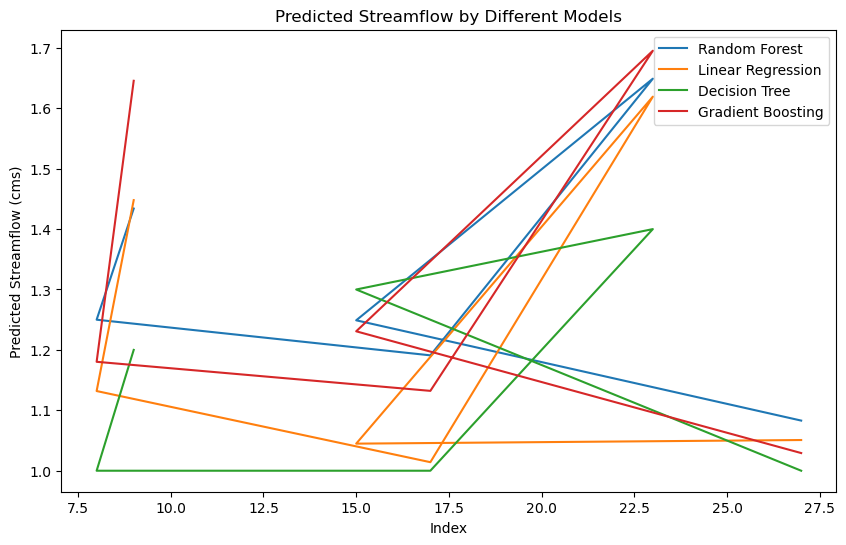

In [53]:
# plot the y predictions
plt.figure(figsize=(10, 6))
for i, (model_name, y_pred) in enumerate(models_y_predict.items()):
    plt.plot(y_test.index, y_pred, label=model_name)
plt.xlabel('Index')
plt.ylabel('Predicted Streamflow (cms)')
plt.title('Predicted Streamflow by Different Models')
plt.legend()
plt.show()

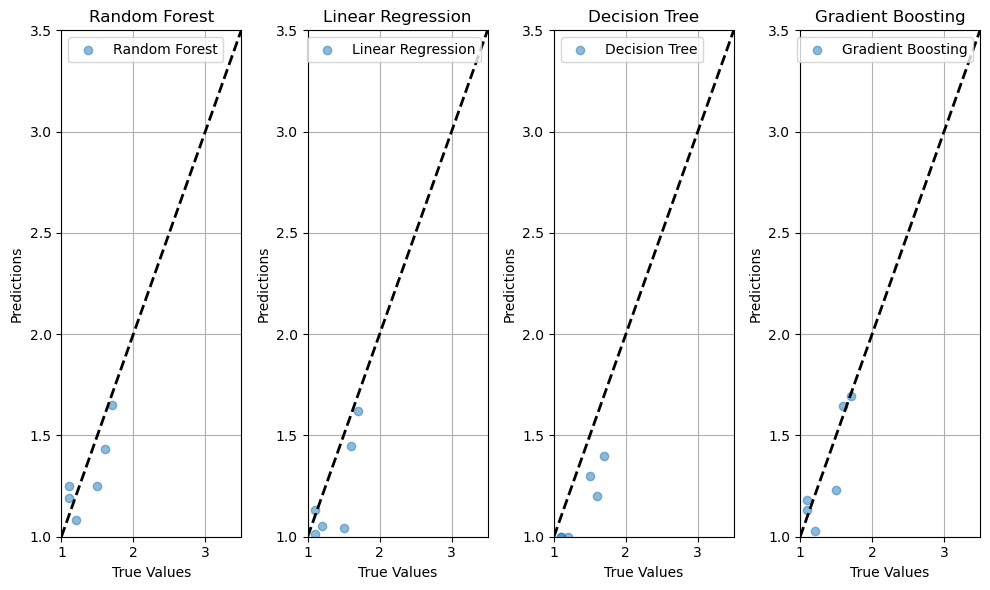

In [54]:
# plot the results
plt.figure(figsize=(10, 6))
for i , (model_name, y_pred) in enumerate(models_y_predict.items(), 1):
    plt.subplot(1, 4, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(model_name)
    plt.xlim([y.min(), y.max()])
    plt.ylim([y.min(), y.max()])
    plt.grid(True)
    plt.legend([model_name])
    plt.plot(label=model_name)
plt.tight_layout()
plt.show()

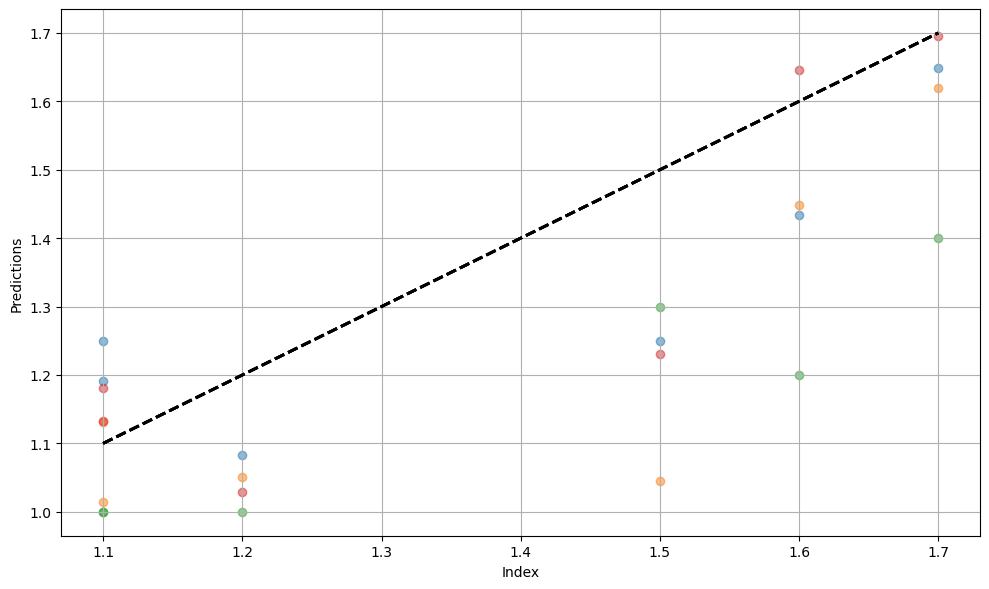

In [81]:
# plot the results
plt.figure(figsize=(10, 6))
for i, (model_name, y_pred) in enumerate(models_y_predict.items()):
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Index')
    plt.ylabel('Predictions')
    plt.grid(True)
    #plt.legend([model_name])
plt.grid(True)
plt.tight_layout()
plt.show()

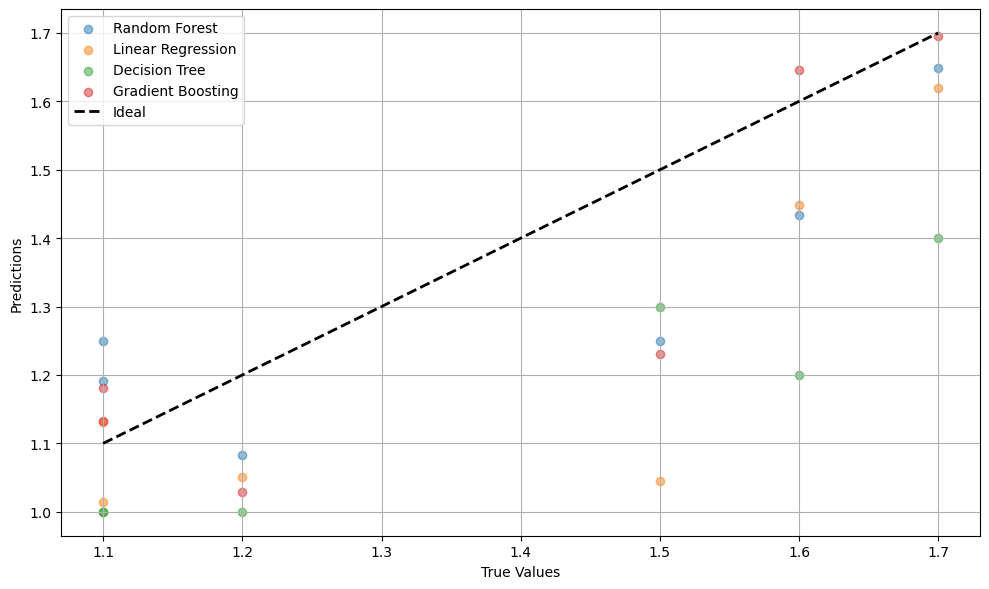

In [82]:
# plot the results
plt.figure(figsize=(10, 6))
for i, (model_name, y_pred) in enumerate(models_y_predict.items()):
    plt.scatter(y_test, y_pred, alpha=0.5, label=model_name)

# plot identity line once
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()  # show the labels
plt.grid(True)
plt.tight_layout()
plt.show()


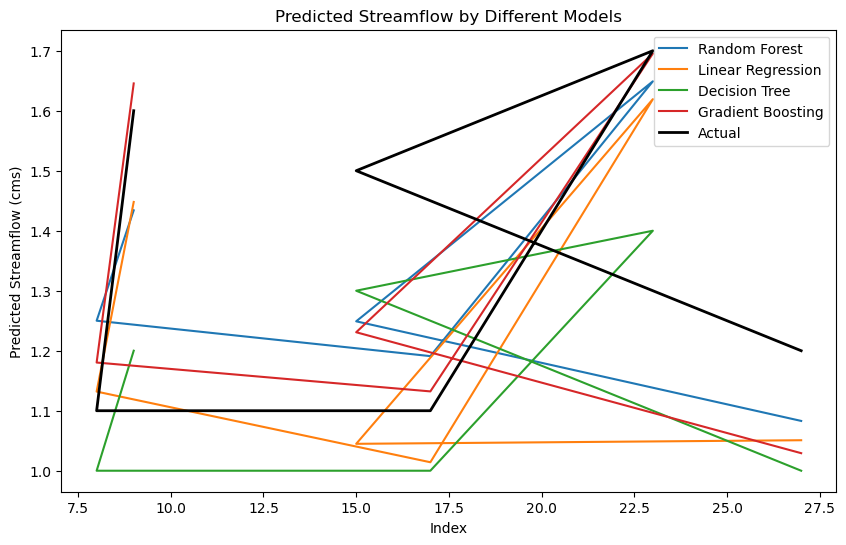

In [37]:
# plot all y predictions and actual values
plt.figure(figsize=(10, 6))
for i, (model_name, y_pred) in enumerate(models_y_predict.items()):
    plt.plot(y_test.index, y_pred, label=model_name)
plt.plot(y_test.index, y_test, label='Actual', color='black', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Predicted Streamflow (cms)')
plt.title('Predicted Streamflow by Different Models')
plt.legend()
plt.show()

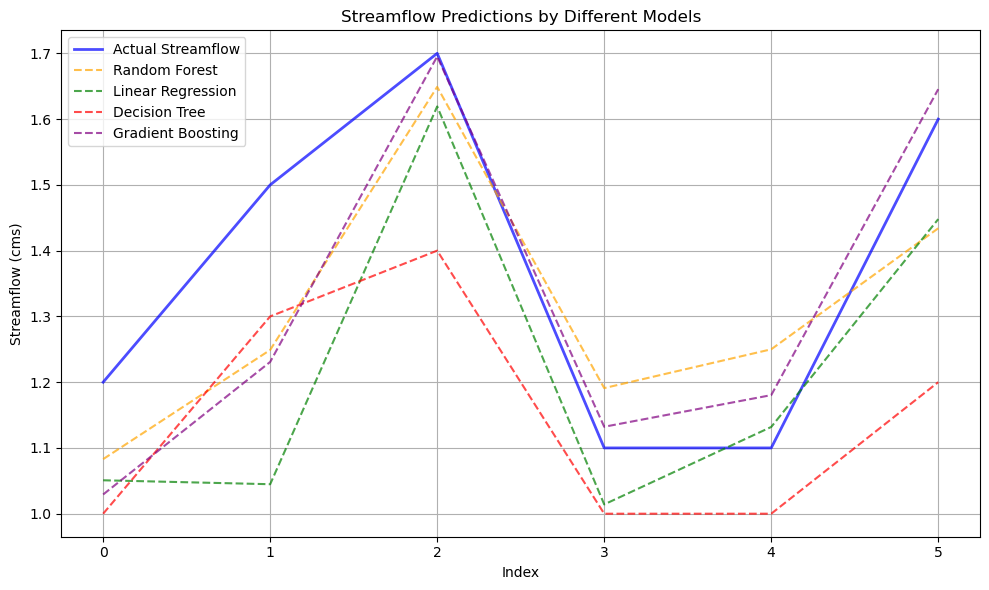

In [38]:
# plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Streamflow', color='blue', linewidth=2, alpha=0.7)
plt.plot(y_pred_rf, label='Random Forest', linestyle='--', color='orange', alpha=0.7)
plt.plot(y_pred_lr, label='Linear Regression', linestyle='--', color='green', alpha=0.7)
plt.plot(y_pred_dt, label='Decision Tree', linestyle='--', color='red', alpha=0.7)
plt.plot(y_pred_gb, label='Gradient Boosting', linestyle='--', color='purple', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Streamflow (cms)')
plt.title('Streamflow Predictions by Different Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()